In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import yfinance as yf
import datetime
from datetime import date, timedelta

In [6]:
today = date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2

In [7]:
data = yf.download('GOOG', 
                      start=start_date, 
                      end=end_date, 
                      progress=False)
data["Date"] = data.index
data = data[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume"]]
data.reset_index(drop=True, inplace=True)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
245,2023-08-28,132.080002,133.240005,130.850006,131.789993,131.789993,16715500
246,2023-08-29,132.998001,137.294998,132.979996,135.490005,135.490005,30803300
247,2023-08-30,135.570007,137.250000,135.020996,136.929993,136.929993,21773400
248,2023-08-31,137.050003,138.399994,136.820007,137.350006,137.350006,28147900
249,2023-09-01,138.429993,138.580002,135.940002,136.800003,136.800003,16665700


In [8]:
data = data[["Date", "Close"]]
data.head()

,Date,Close
0,2022-09-06,107.480003
1,2022-09-07,110.480003
2,2022-09-08,109.419998
3,2022-09-09,111.779999
4,2022-09-12,111.870003


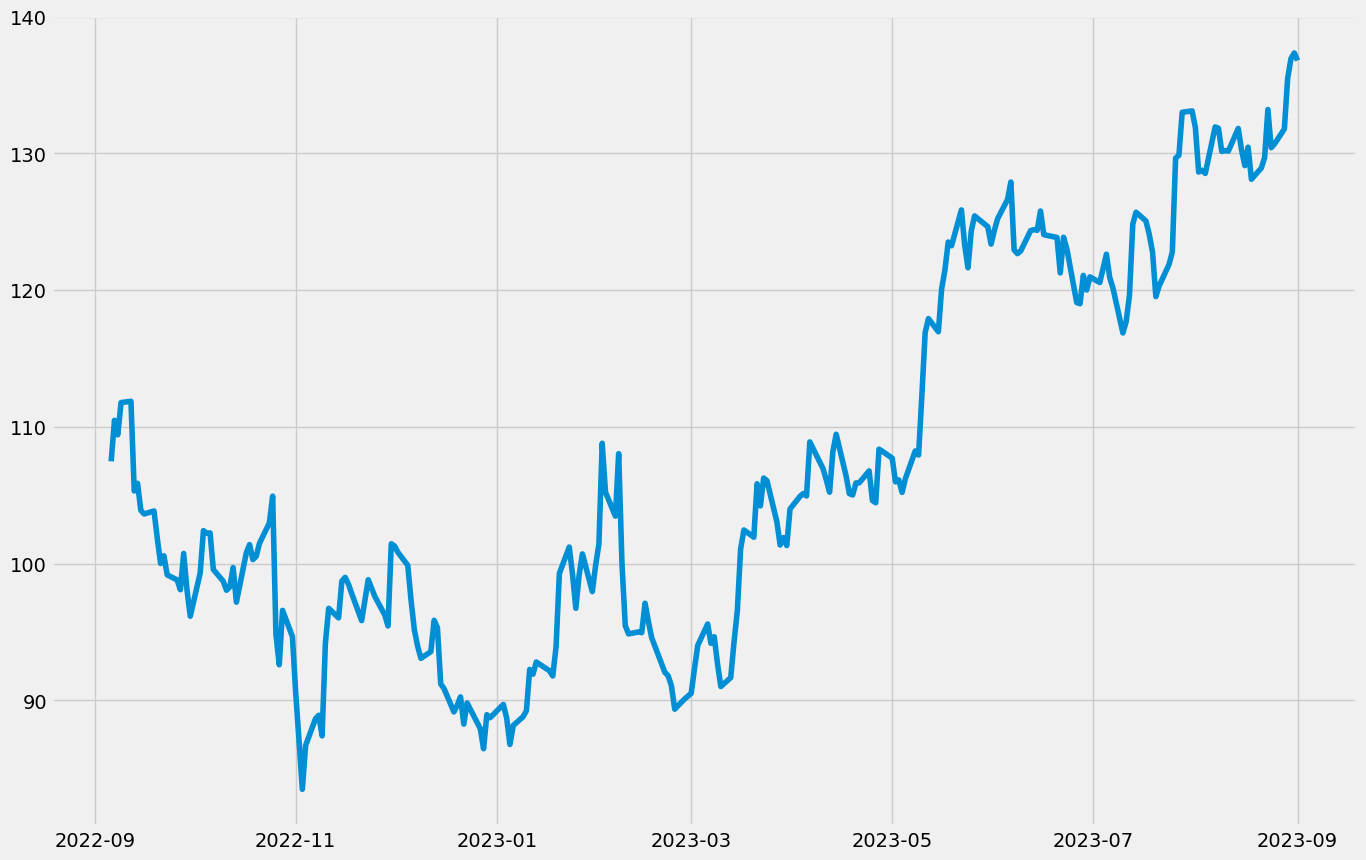

In [9]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.plot(data["Date"], data["Close"])

<Figure size 640x480 with 0 Axes>

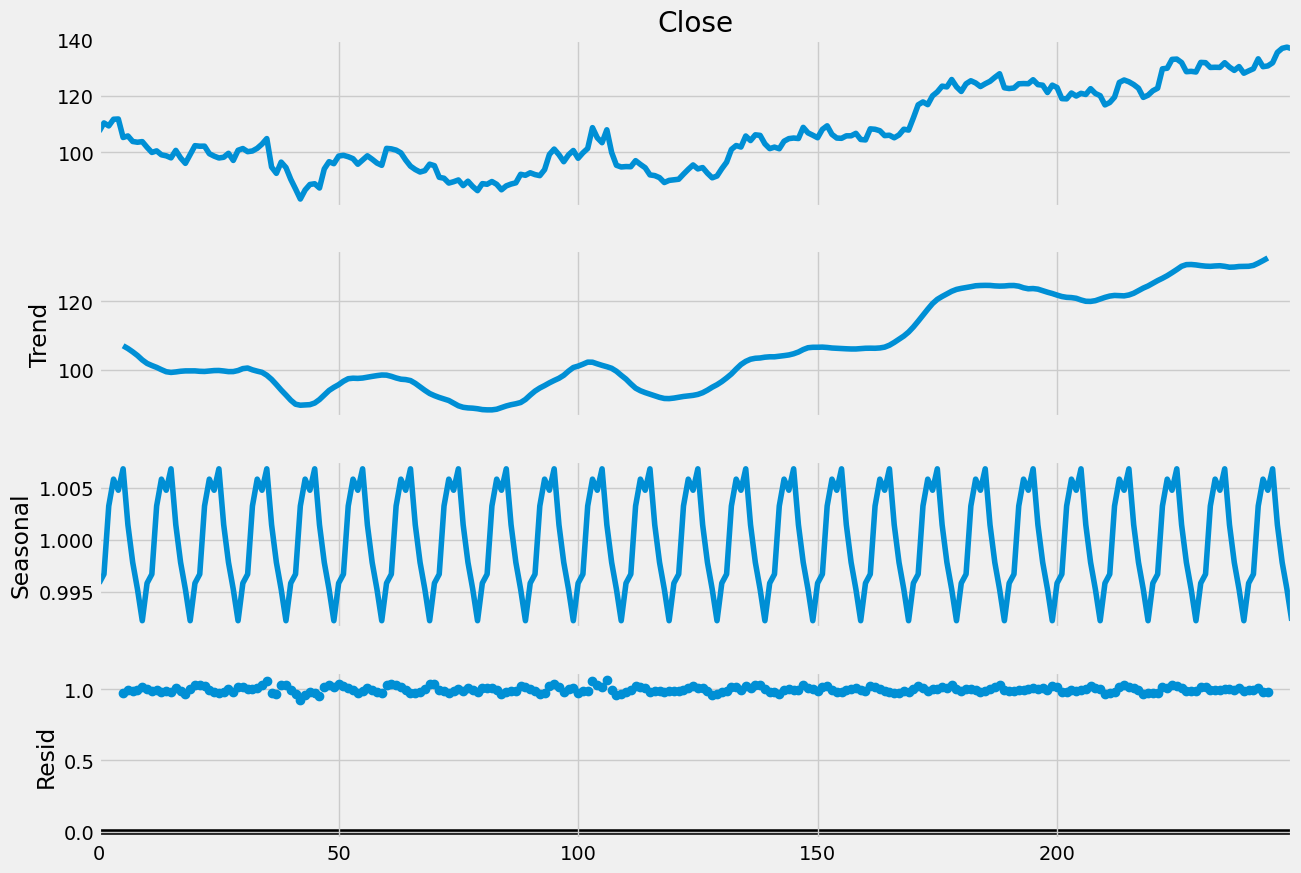

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data["Close"], model='multiplicative' ,period =10  )
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 10)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

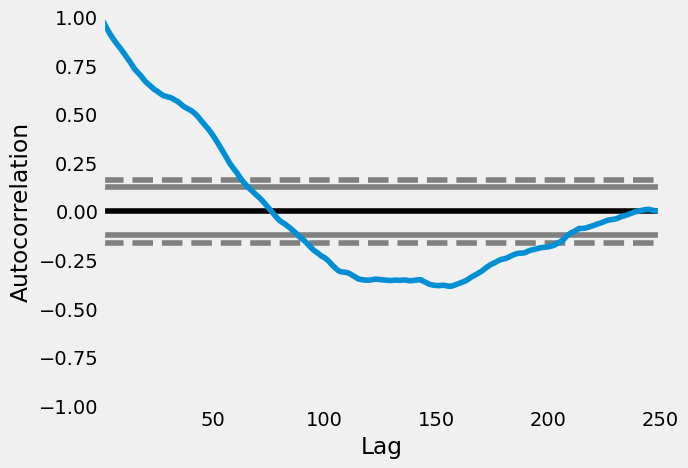

In [14]:
pd.plotting.autocorrelation_plot(data["Close"])

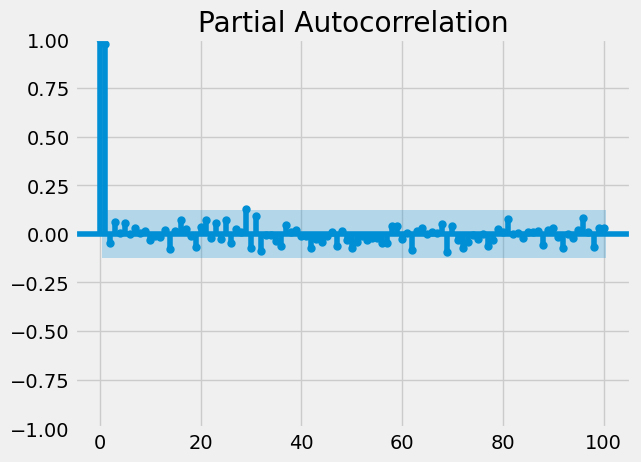

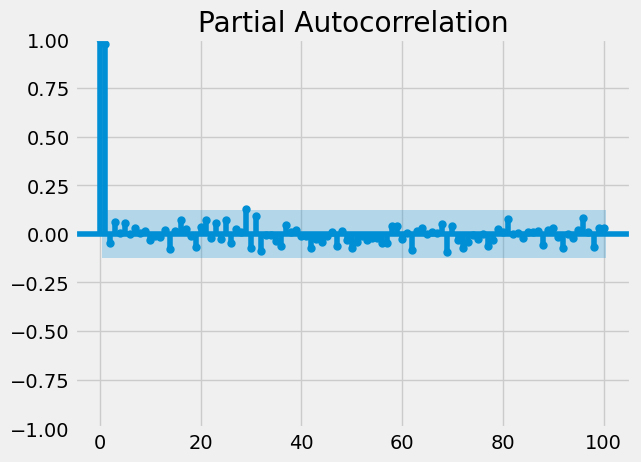

In [15]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data["Close"], lags = 100)

In [19]:
p, d, q = 5, 1, 2
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data["Close"], order=(p, d, q))
fitted = model.fit()
fitted.summary()


C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  250
Model:                 ARIMA(5, 1, 2)   Log Likelihood                -558.637
Date:                Mon, 04 Sep 2023   AIC                           1133.275
Time:                        15:16:41   BIC                           1161.414
Sample:                             0   HQIC                          1144.601
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5838      2.639      0.221      0.825      -4.588       5.755
ar.L2          0.2074      2.399      0.086      0.931      -4.494       4.909
ar.L3          0.0561      0.438      0.128      0.898      -0.801       0.914
ar.L4         -0.0076      0.308     -0.025      0.980      -0.612       0.597
ar.L5          0.0112      0.125      0.089      0.929      -0.234       0.256
ma.L1         -0.5333      2.650     -0.201      0.841      -5.727       4.661
ma.L2         -0.3515      2.274     -0.155      0.877      -4.808       4.105
sigma2         5.2017      0.337     15.421      0.000       4.541       5.863
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                50.12
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.78   Skew:                            -0.11
Prob(H) (two-sided):                  0.26   Kurtosis:                         5.19
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [21]:
predictions = fitted.predict()
predictions

0        0.000000
1      107.480029
2      110.615832
3      109.035019
4      112.053317
          ...    
245    131.048003
246    131.611925
247    135.625004
248    136.507391
249    137.187865
Name: predicted_mean, Length: 250, dtype: float64

In [22]:
import statsmodels.api as sm
import warnings
model=sm.tsa.statespace.SARIMAX(data['Close'],
                                order=(p, d, q),
                                seasonal_order=(p, d, q, 12))
model=model.fit()
print(model.summary())

C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\tranq\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  250
Model:             SARIMAX(5, 1, 2)x(5, 1, 2, 12)   Log Likelihood                -546.805
Date:                            Mon, 04 Sep 2023   AIC                           1123.610
Time:                                    15:19:11   BIC                           1175.630
Sample:                                         0   HQIC                          1144.577
                                            - 250                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3559      3.968      0.090      0.929      -7.421       8.133
ar.L2          0.0769      1.854   

In [23]:
predictions = model.predict(len(data), len(data)+10)
predictions

250    137.162621
251    137.189049
252    136.919452
253    137.231904
254    137.869773
255    139.000517
256    138.437557
257    138.569423
258    138.397037
259    138.901868
260    139.535220
Name: predicted_mean, dtype: float64

<Axes: >

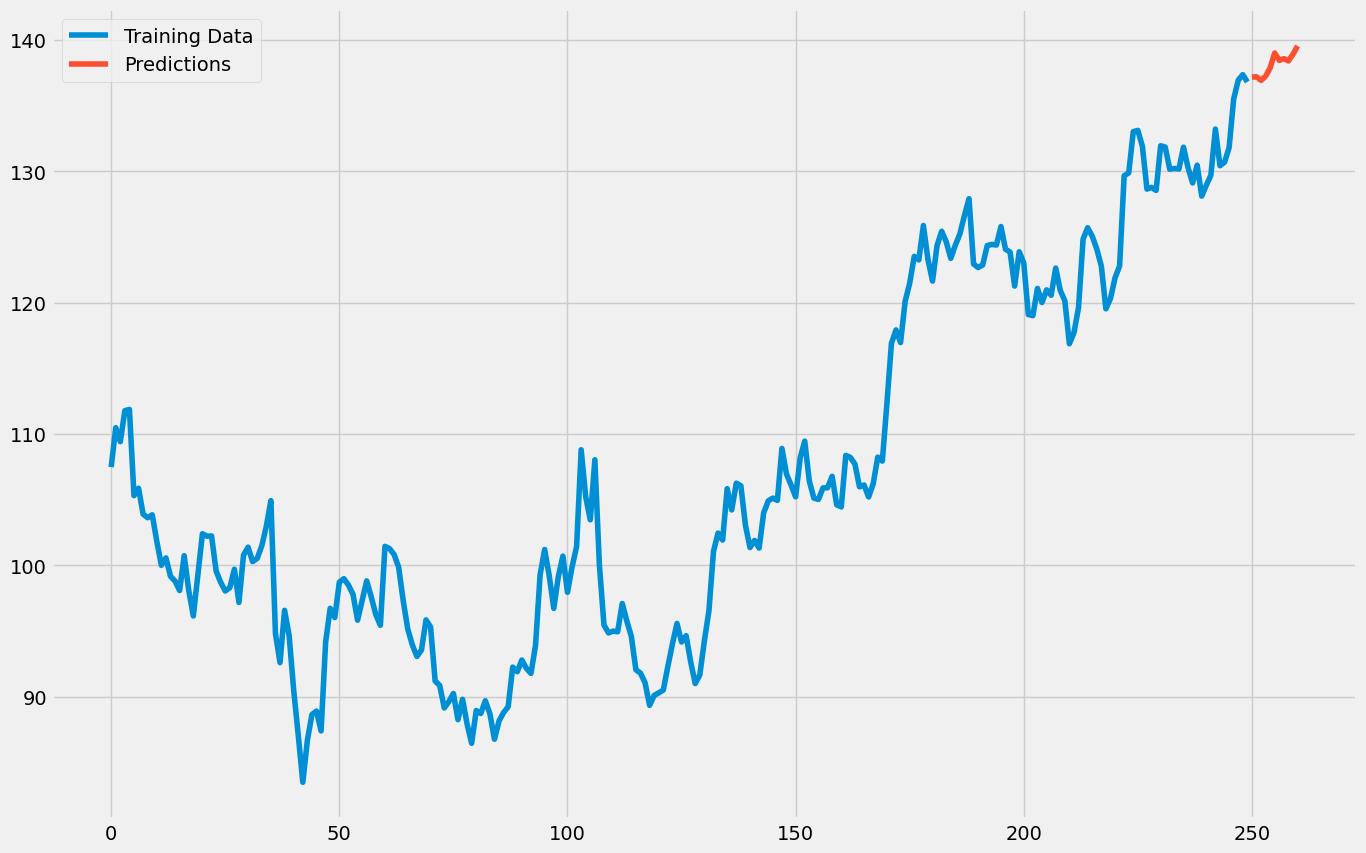

In [24]:
data["Close"].plot(legend=True, label="Training Data", figsize=(15, 10))
predictions.plot(legend=True, label="Predictions")